In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-05-28 12:38:37--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2023-05-28 12:38:38 (12.6 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# converting categorical data to numbers
dataset = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'])

dataset.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [4]:
# splitting the data into training and testing sets
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

In [5]:
# pop off the "expenses" column to create the training and test labels
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

train_labels.head()

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

In [6]:
# creating the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(train_dataset.keys()),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

In [7]:
# compile the model using the RMSprop optimizer and mean squared error as loss function
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mae', 'mse'])

In [8]:
# train the model
model.fit(train_dataset, train_labels, epochs=500, verbose=2)

Epoch 1/500
34/34 - 2s - loss: 321731808.0000 - mae: 13320.2959 - mse: 321731808.0000 - 2s/epoch - 44ms/step
Epoch 2/500
34/34 - 0s - loss: 319405408.0000 - mae: 13237.4385 - mse: 319405408.0000 - 79ms/epoch - 2ms/step
Epoch 3/500
34/34 - 0s - loss: 315105984.0000 - mae: 13084.3506 - mse: 315105984.0000 - 80ms/epoch - 2ms/step
Epoch 4/500
34/34 - 0s - loss: 308368288.0000 - mae: 12841.7461 - mse: 308368288.0000 - 79ms/epoch - 2ms/step
Epoch 5/500
34/34 - 0s - loss: 298961344.0000 - mae: 12493.7705 - mse: 298961344.0000 - 75ms/epoch - 2ms/step
Epoch 6/500
34/34 - 0s - loss: 286989504.0000 - mae: 12031.5205 - mse: 286989504.0000 - 62ms/epoch - 2ms/step
Epoch 7/500
34/34 - 0s - loss: 271755808.0000 - mae: 11425.5889 - mse: 271755808.0000 - 53ms/epoch - 2ms/step
Epoch 8/500
34/34 - 0s - loss: 253469888.0000 - mae: 10696.6758 - mse: 253469888.0000 - 51ms/epoch - 1ms/step
Epoch 9/500
34/34 - 0s - loss: 233347808.0000 - mae: 9898.3809 - mse: 233347808.0000 - 56ms/epoch - 2ms/step
Epoch 10/500

9/9 - 0s - loss: 21831088.0000 - mae: 2694.3423 - mse: 21831088.0000 - 196ms/epoch - 22ms/step
Testing set Mean Abs Error: 2694.34 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


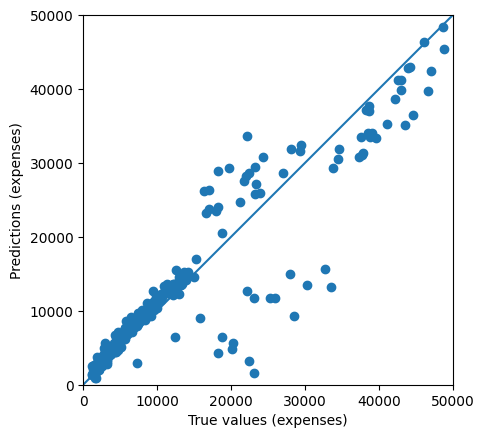

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
